reference:   
[Python Histogram Plotting: NumPy, Matplotlib, Pandas & Seaborn](https://realpython.com/python-histograms/)   
[直方图](https://zh.wikipedia.org/wiki/%E7%9B%B4%E6%96%B9%E5%9B%BE)   
[5种方法教你用Python玩转histogram直方图](https://segmentfault.com/a/1190000015659597?utm_source=tag-newest)

在统计学中，直方图（英语：Histogram）是一种对数据分布情况的图形表示，是一种二维统计图表，它的两个坐标分别是统计样本和该样本对应的某个属性的度量。

文档结构：   
纯Python实现直方图，不使用任何第三方库   
使用Numpy来创建直方图总结数据   
使用matplotlib，pandas，seaborn绘制直方图      

## 纯Python实现histogram

In [3]:
# handmade function
a = [0, 1, 1, 1, 2, 3, 7, 7, 23]
def count_elements(seq):
    '计算列表元素出现的次数，返回字典'
    hist = {}
    for i in seq:
         hist[i] = hist.get(i, 0) + 1 #dict.get(key, default=None)
    return hist

counted = count_elements(a)
counted

{0: 1, 1: 3, 2: 1, 3: 1, 7: 2, 23: 1}

In [4]:
# Python’s standard library collections.Counter class
from collections import Counter

recounted = Counter(a)
recounted

Counter({0: 1, 1: 3, 2: 1, 3: 1, 7: 2, 23: 1})

In [5]:
recounted.items() == counted.items()

True

In [6]:
def ascii_histogram(seq):
    """A horizontal frequency-table/histogram plot."""
    counted = count_elements(seq)
    for k in sorted(counted):
        print('{0:5d} {1}'.format(k, '+' * counted[k]))
import random
random.seed(1)

vals = [1, 3, 4, 6, 8, 9, 10]
# Each number in `vals` will occur between 5 and 15 times.
freq = (random.randint(5, 15) for _ in vals)

data = []
for f, v in zip(freq, vals):
     data.extend([v] * f)
data[5]

1

In [7]:
ascii_histogram(data)

    1 +++++++
    3 ++++++++++++++
    4 ++++++
    6 +++++++++
    8 ++++++
    9 ++++++++++++
   10 ++++++++++++


**总结：纯python实现频数表（非标准直方图），可直接使用collection.Counter方法实现。**

## 使用Numpy实现histogram   
以上是使用纯Python来完成的简单直方图，但是从数学意义上来看，**直方图是分箱到频数的一种映射**，它可以用来估计变量的概率密度函数的。而上面纯Python实现版本只是单纯的频数统计，不是真正意义上的直方图。

因此，我们从上面实现的简单直方图继续往下进行升级。一个真正的直方图首先应该是将变量分区域（箱）的，也就是分成不同的区间范围，然后对每个区间内的观测值数量进行计数。恰巧，Numpy的直方图方法就可以做到这点，不仅仅如此，它也是后面将要提到的matplotlib和pandas使用的基础

举个例子，来看一组从拉普拉斯分布上提取出来的浮点型样本数据。这个分布比标准正态分布拥有更宽的尾部，并有两个描述参数（location和scale）：

In [8]:
import numpy as np

np.random.seed(444)
np.set_printoptions(precision=3)

d = np.random.laplace(loc=15, scale=3, size=500)
d[:5]

array([18.406, 18.087, 16.004, 16.221,  7.358])

由于这是一个连续型的分布，对于每个单独的浮点值（即所有的无数个小数位置）并不能做很好的标签（因为点实在太多了）。但是，你可以将数据做 分箱 处理，然后统计每个箱内观察值的数量，这就是真正的直方图所要做的工作。   
下面我们看看是如何用Numpy来实现直方图频数统计的。

In [9]:
#默认地使用10个相同大小的区间（箱），然后返回一个元组（频数，分箱的边界）
#https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.histogram.html
hist, bin_edges = np.histogram(d)

In [10]:
hist

array([ 13,  23,  91, 261,  80,  21,   7,   2,   1,   1], dtype=int64)

In [11]:
bin_edges

array([ 2.11 ,  5.874,  9.638, 13.402, 17.166, 20.93 , 24.694, 28.458,
       32.222, 35.986, 39.749])

In [12]:
hist.size, bin_edges.size

(10, 11)

除了np.histogram之外，还存在其它两种可以达到同样功能的方法：np.bincount() 和 np.searchsorted()，下面看看代码以及比较结果。

In [13]:
bcounts = np.bincount(a)
print bcounts
print type(a)

SyntaxError: Missing parentheses in call to 'print' (<ipython-input-13-b6189089be00>, line 2)

In [ ]:
print a
hist, _ = np.histogram(a, range=(0,max(a)), bins=max(a) + 1)
hist

In [ ]:
np.array_equal(hist, bcounts)

In [ ]:
# Reproducing `collections.Counter`
dict(zip(np.unique(a), bcounts[bcounts.nonzero()]))

**总结：通过Numpy实现直方图，可直接使用np.histogram()或者np.bincount()。**

## 使用Matplotlib和Pandas可视化Histogram   
使用更为强大的Python库包来完成直方图。Matplotlib基于Numpy的histogram进行了多样化的封装并提供了更加完善的可视化功能。

In [23]:
print(type(d))
print(d.shape)
# print(d)

<class 'numpy.ndarray'>
(500,)


matplotlib.pyplot.hist(x, bins=None, range=None, density=None, weights=None, cumulative=False, bottom=None, histtype='bar', align='mid', orientation='vertical', rwidth=None, log=False, color=None, label=None, stacked=False, normed=None, *, data=None, **kwargs)[source]¶
Plot a histogram.

Compute and draw the histogram of x. The return value is a tuple (n, bins, patches) or ([n0, n1, ...], bins, [patches0, patches1,...]) if the input contains multiple data.

Multiple data can be provided via x as a list of datasets of potentially different length ([x0, x1, ...]), or as a 2-D ndarray in which each column is a dataset. Note that the ndarray form is transposed relative to the list form.

Masked arrays are not supported at present.

[ 2.  2.  3.  5.  1.  3.  2.  9. 10. 17. 15. 26. 26. 51. 70. 69. 54. 31.
 28. 23.  7. 14. 11.  6.  4.  0.  1.  3.  1.  2.  1.  1.  0.  0.  0.  0.
  0.  1.  0.  0.  0.  0.  0.  1.]
[ 2.11   2.966  3.821  4.677  5.532  6.387  7.243  8.098  8.954  9.809
 10.665 11.52  12.376 13.231 14.086 14.942 15.797 16.653 17.508 18.364
 19.219 20.074 20.93  21.785 22.641 23.496 24.352 25.207 26.063 26.918
 27.773 28.629 29.484 30.34  31.195 32.051 32.906 33.761 34.617 35.472
 36.328 37.183 38.039 38.894 39.749]
<a list of 44 Patch objects>


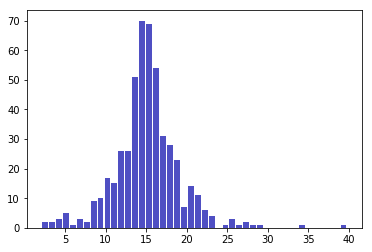

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline

#  matplotlib.axes.Axes.hist() 方法的接口
#bins='auto' 自动在写好的两个算法中择优选择并最终算出最适合的分箱数。这里，算法的目的就是选择出一个合适的区间（箱）宽度，并生成一个最能代表数据的直方图来
n, bins, patches = plt.hist(x=d, bins='auto', color='#0504aa',alpha=0.7, rwidth=0.85)#
print(n)
print(bins)
print(patches)
# plt.grid(axis='y', alpha=0.75)
# plt.xlabel('Value')
# plt.ylabel('Frequency')
# plt.title('My Very Own Histogram')
# plt.text(23, 45, r'$\mu=15, b=3$')
# maxfreq = n.max()
# # 设置y轴的上限
# plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)
plt.show()

Pandas绘制直方图   
Series.histogram()  [官方API](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.hist.html?highlight=histogram)    
pandas.DataFrame.histogram() 的用法与Series是一样的，但生成的是对DataFrame数据中的每一列的直方图。   
[官方API](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.hist.html?highlight=histogram) 

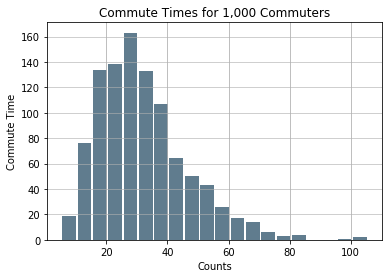

In [27]:
import pandas as pd

size, scale = 1000, 10
commutes = pd.Series(np.random.gamma(scale, size=size) ** 1.5)

commutes.plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='#607c8e')
plt.title('Commute Times for 1,000 Commuters')
plt.xlabel('Counts')
plt.ylabel('Commute Time')
plt.grid(axis='y', alpha=0.75)
plt.show()

In [29]:
frame = pd.DataFrame({
     'length': [1.5, 0.5, 1.2, 0.9, 3],
     'width': [0.7, 0.2, 0.15, 0.2, 1.1]
     }, index= ['pig', 'rabbit', 'duck', 'chicken', 'horse'])
print(frame)

         length  width
pig         1.5   0.70
rabbit      0.5   0.20
duck        1.2   0.15
chicken     0.9   0.20
horse       3.0   1.10


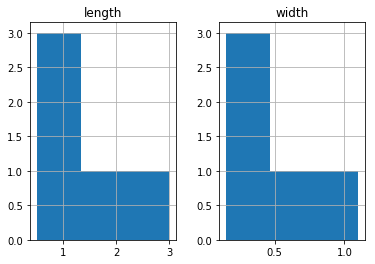

In [33]:
hist = frame.hist(bins=3)

**总结：通过pandas实现直方图，可使用Seris.plot.hist()，DataFrame.plot.hist()，matplotlib实现直方图可以用matplotlib.pyplot.hist()。**